# **INFRAESTRUTURA**

Para as questões a seguir, você deverá executar códigos em um notebook Jupyter, rodando em ambiente local, certifique-se que:

1. ***Você está rodando em Python 3.9+***

In [1]:
!python --version

Python 3.12.12


2. ***Você está usando um ambiente virtual: Virtualenv ou Anaconda***

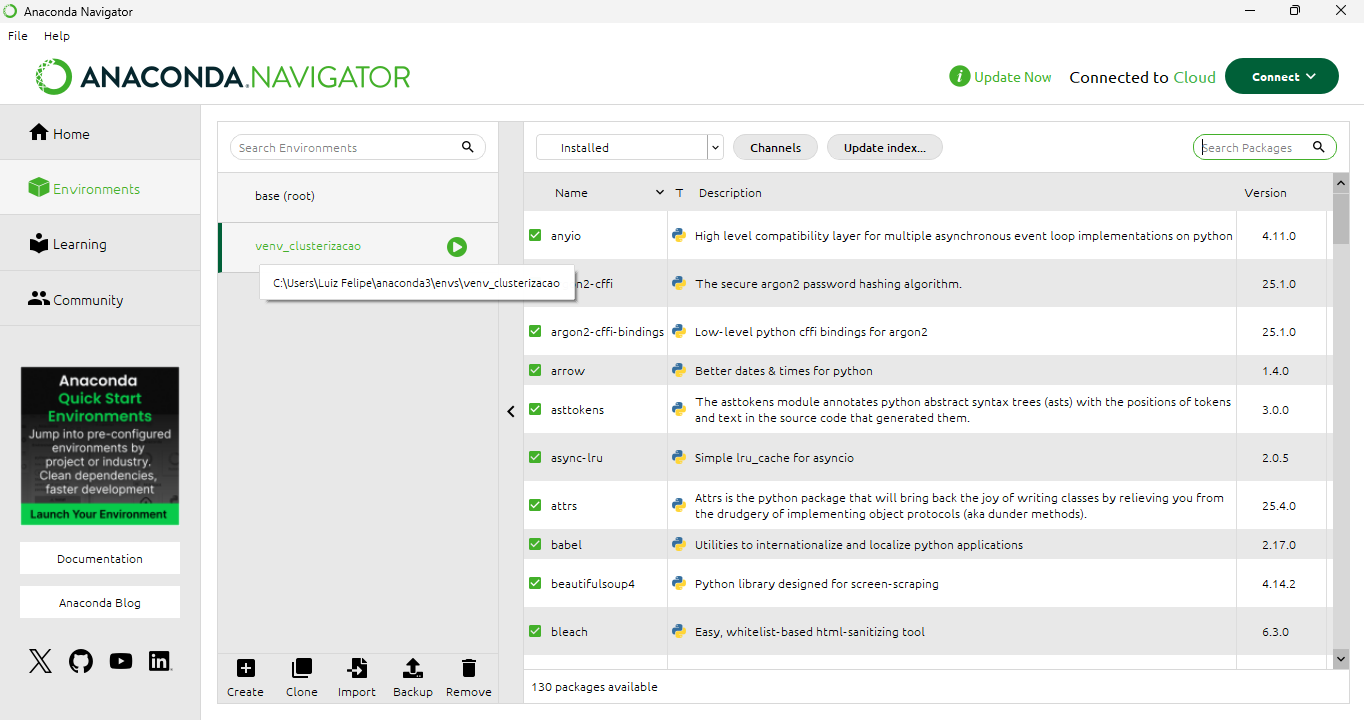

3. ***Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico***

Requisito atendido no arquivo "requeriments.txt", presente no repositório

https://github.com/luizfelipesouzaivo/cluster-model-validation/blob/main/requirements.txt

4. ***Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.***

In [2]:
!pip freeze > requirements.txt

In [3]:
!pip freeze

absl-py==1.4.0
accelerate==1.12.0
access==1.1.9
affine==2.4.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.2
aiosignal==1.4.0
aiosqlite==0.21.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.17.2
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.11.0
anywidget==0.9.21
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.3
arrow==1.4.0
arviz==0.22.0
astropy==7.1.1
astropy-iers-data==0.2025.11.24.0.39.11
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.1.0
Authlib==1.6.5
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.22.6
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.29.1
bigquery-magics==0.10.3
bleach==6.3.0
blinker==1.9.0
blis==1.3.3
blobfile==3.1.0
blosc2==3.11.1
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
brotli==1.2.0
CacheControl==0.14.4
cachetools==6.2.2
catalogue==2.0.10
certifi==2025.11.12
cffi==2.0.0
chardet==5.2.0
charset-normalizer==3.4.4
chex=

5. ***Tire um printscreen do ambiente que será usado rodando em sua máquina.***

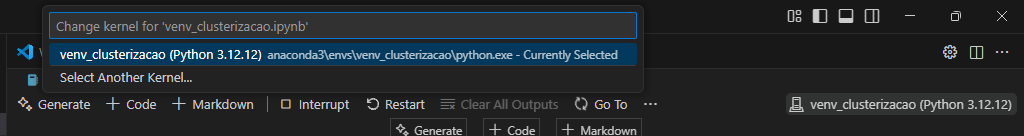

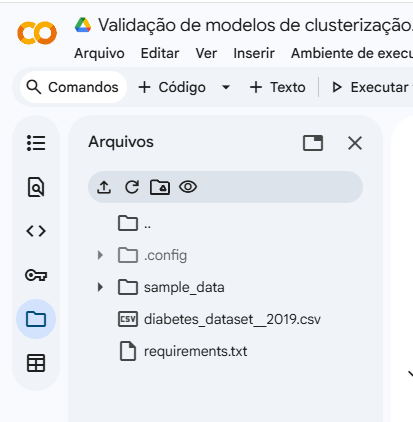

6. ***Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).***

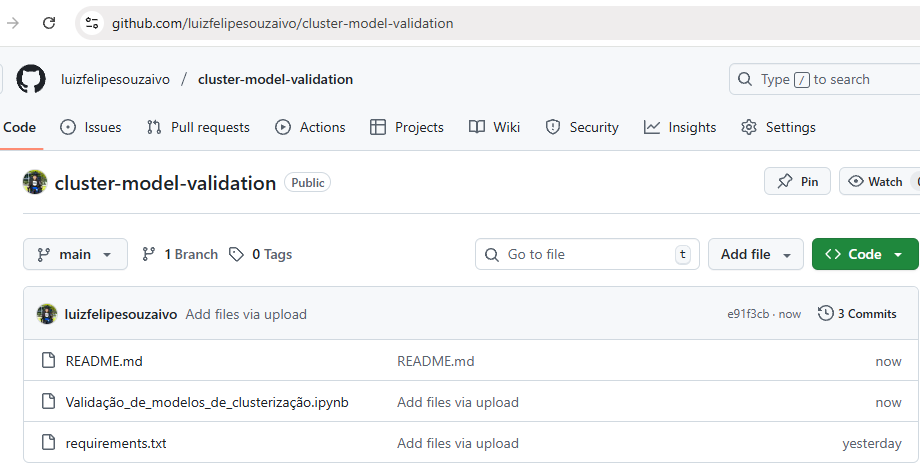

# **ESCOLHA DE BASE DE DADOS**

Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

In [4]:
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, davies_bouldin_score, calinski_harabasz_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. ***Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.***

In [5]:
uploaded = files.upload()

Saving diabetes_dataset__2019.csv to diabetes_dataset__2019.csv


In [6]:
dados = pd.read_csv('diabetes_dataset__2019.csv')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [7]:
print(dados.isnull().sum())

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64


In [8]:
dados.Pregancies.value_counts(dropna=False)

,count
Pregancies,
0.0,754
2.0,64
3.0,60
NaN,42
1.0,28
4.0,4


In [9]:
dados.loc[pd.isnull(dados.BMI), 'BMI'] = dados.BMI.mean()
dados.loc[pd.isnull(dados.Pregancies), 'Pregancies'] = 0
dados.loc[pd.isnull(dados.Pdiabetes), 'Pdiabetes'] = 0
dados.loc[pd.isnull(dados.Diabetic), 'Diabetic'] = 'no'

dados.loc[:, 'Diabetic'] = dados.Diabetic.replace(' no', 'no')
dados.loc[:, 'Pdiabetes'] = dados.Pdiabetes.replace('o', 'no')
dados.loc[:, 'RegularMedicine'] = dados.RegularMedicine.replace('O', 'no')
dados.loc[:, 'BPLevel'] = dados.BPLevel.replace('normal ', 'normal').replace('High', 'high').replace('Low', 'low')

In [10]:
cols_categoricas = dados.select_dtypes(include='object').columns

# Aplica get_dummies em todas as colunas categóricas, convertendo diretamente para inteiro
dataset = pd.get_dummies(dados, columns=cols_categoricas, dtype=int)
dataset

,BMI,Sleep,SoundSleep,Pregancies,Age_40-49,Age_50-59,Age_60 or older,Age_less than 40,Gender_Female,Gender_Male,...,BPLevel_low,BPLevel_normal,Pdiabetes_0,Pdiabetes_0,Pdiabetes_no,Pdiabetes_yes,UriationFreq_not much,UriationFreq_quite often,Diabetic_no,Diabetic_yes
0,39.0,8,6,0.0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1,28.0,8,6,0.0,0,1,0,0,0,1,...,0,1,0,1,0,0,1,0,1,0
2,24.0,6,6,0.0,1,0,0,0,0,1,...,0,1,0,1,0,0,1,0,1,0
3,23.0,8,6,0.0,0,1,0,0,0,1,...,0,1,0,1,0,0,1,0,1,0
4,27.0,8,8,0.0,1,0,0,0,0,1,...,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,25.0,8,6,0.0,0,0,0,1,0,1,...,0,1,0,1,0,0,1,0,0,1
948,27.0,6,5,0.0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
949,23.0,6,5,0.0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
950,27.0,6,5,0.0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [11]:
dataset.dtypes

,0
BMI,float64
Sleep,int64
SoundSleep,int64
Pregancies,float64
Age_40-49,int64
Age_50-59,int64
Age_60 or older,int64
Age_less than 40,int64
Gender_Female,int64
Gender_Male,int64


In [12]:
dataset.describe()

,BMI,Sleep,SoundSleep,Pregancies,Age_40-49,Age_50-59,Age_60 or older,Age_less than 40,Gender_Female,Gender_Male,...,BPLevel_low,BPLevel_normal,Pdiabetes_0,Pdiabetes_0,Pdiabetes_no,Pdiabetes_yes,UriationFreq_not much,UriationFreq_quite often,Diabetic_no,Diabetic_yes
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,...,952.000000,952.000000,952.00000,952.000000,952.00000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,25.763713,6.949580,5.495798,0.369748,0.172269,0.163866,0.151261,0.512605,0.390756,0.609244,...,0.029412,0.743697,0.00105,0.983193,0.00105,0.014706,0.697479,0.302521,0.720588,0.279412
std,5.391222,1.273189,1.865618,0.892691,0.377812,0.370348,0.358491,0.500104,0.488176,0.488176,...,0.169047,0.436820,0.03241,0.128614,0.03241,0.120436,0.459591,0.459591,0.448946,0.448946
min,15.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,7.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.00000,1.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,29.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.00000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000
max,45.000000,11.000000,11.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


2. ***Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.***

Escolhi esse dataset porque ele traz informações de saúde bem variadas, desde hábitos de vida até fatores de risco e medidas biométricas. Esse tipo de conjunto de dados é muito útil para estudos que buscam identificar padrões, entender comportamentos e até descobrir possíveis grupos dentro da população.

Além disso, ele representa bem os desafios de um projeto real: possui variáveis numéricas, categóricas e também alguns valores ausentes, o que exige um bom trabalho de preparação e análise. Eu cheguei a testar outros datasets, mas mesmo ajustando e limpando, eles não apresentaram resultados tão bons. Por isso, este acabou sendo a escolha mais adequada para desenvolver um projeto mais completo e realista.

3. ***Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?***

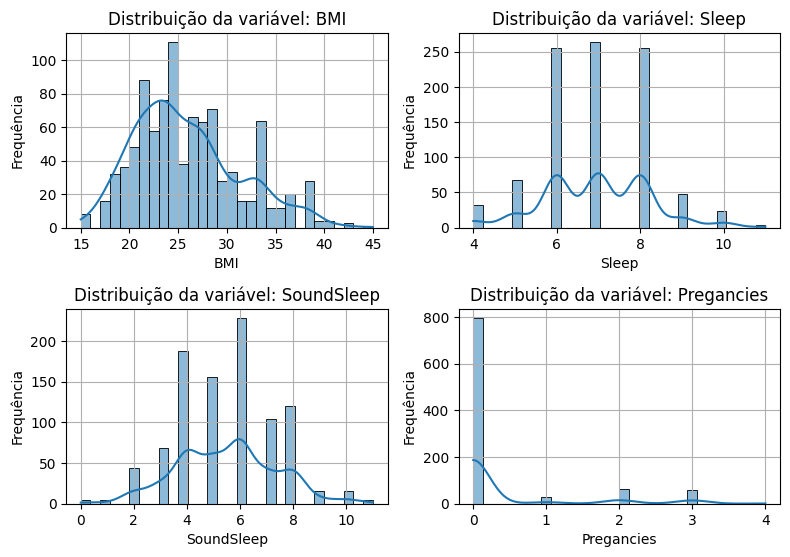

In [13]:
variaveis = ['BMI', 'Sleep', 'SoundSleep', 'Pregancies']
plt.figure(figsize=(8, 8))

for i, var in enumerate(variaveis, 1):
    plt.subplot(3, 2, i)
    sns.histplot(dataset[var], kde=True, bins=30)
    plt.title(f'Distribuição da variável: {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.grid(True)
plt.tight_layout()
plt.show()

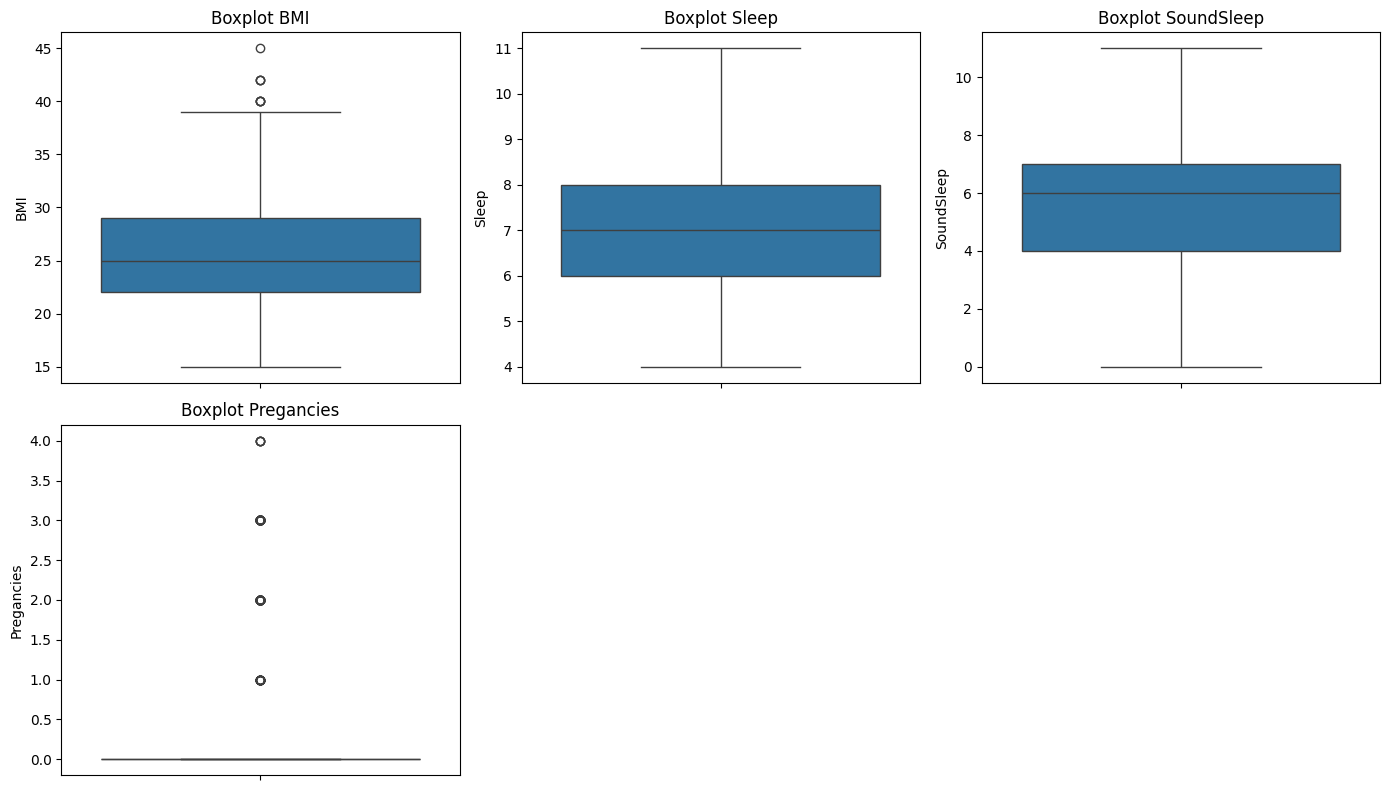

In [14]:
variaveis = ['BMI', 'Sleep', 'SoundSleep', 'Pregancies']

plt.figure(figsize=(14, 8))
for i, coluna in enumerate(variaveis, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=dataset, y=coluna)
    plt.title(f'Boxplot {coluna}')
    plt.xlabel('')
    plt.ylabel(coluna)

plt.tight_layout()
plt.show()

4. ***Realize o pré-processamento adequado dos dados. Descreva os passos necessários.***

In [15]:
columns_to_scale = ['BMI', 'Sleep', 'SoundSleep', 'Pregancies']
scaler = StandardScaler()
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])
dataset_ajustado = dataset[columns_to_scale]
dataset_ajustado

,BMI,Sleep,SoundSleep,Pregancies
0,2.456446,0.825465,0.270402,-0.414413
1,0.415020,0.825465,0.270402,-0.414413
2,-0.327317,-0.746220,0.270402,-0.414413
3,-0.512902,0.825465,0.270402,-0.414413
4,0.229435,0.825465,1.342997,-0.414413
...,...,...,...,...
947,-0.141733,0.825465,0.270402,-0.414413
948,0.229435,-0.746220,-0.265895,-0.414413
949,-0.512902,-0.746220,-0.265895,-0.414413
950,0.229435,-0.746220,-0.265895,-0.414413


# **CLUSTERIZAÇÃO**

Para os dados pré-processados da etapa anterior você irá:

1. ***Realizar o agrupamento dos dados, escolhendo o número ótimo de clusters. Para tal, use o índice de silhueta e as técnicas:***

1. ***A) K-MÉDIAS***

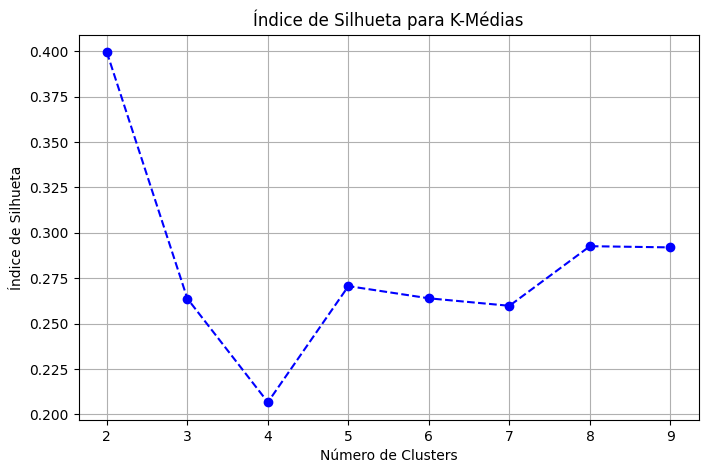

Melhor número de clusters (K-Means): 2


In [16]:
# Testar diferentes números de clusters
silhouette_scores = []
clusters_range = range(2, 10)
for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(dataset_ajustado)
    silhouette_avg = silhouette_score(dataset_ajustado, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 5))
plt.plot(clusters_range, silhouette_scores, marker='o', linestyle='--', color='b')
plt.title('Índice de Silhueta para K-Médias')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Silhueta')
plt.grid(True)
plt.show()

# Escolher o melhor número de clusters
best_kmeans_clusters = clusters_range[silhouette_scores.index(max(silhouette_scores))]
print(f'Melhor número de clusters (K-Means): {best_kmeans_clusters}')

In [17]:
n_clusters = best_kmeans_clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(dataset_ajustado[columns_to_scale])
dataset_ajustado['KMeans_Cluster'] = kmeans_labels
dataset_ajustado.head()

/tmp/ipython-input-1450747862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_ajustado['KMeans_Cluster'] = kmeans_labels


,BMI,Sleep,SoundSleep,Pregancies,KMeans_Cluster
0,2.456446,0.825465,0.270402,-0.414413,0
1,0.415020,0.825465,0.270402,-0.414413,0
2,-0.327317,-0.746220,0.270402,-0.414413,0
3,-0.512902,0.825465,0.270402,-0.414413,0
4,0.229435,0.825465,1.342997,-0.414413,0


In [18]:
silhouette_avg = silhouette_score(dataset_ajustado[columns_to_scale], dataset_ajustado['KMeans_Cluster'])
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.3994814281052966


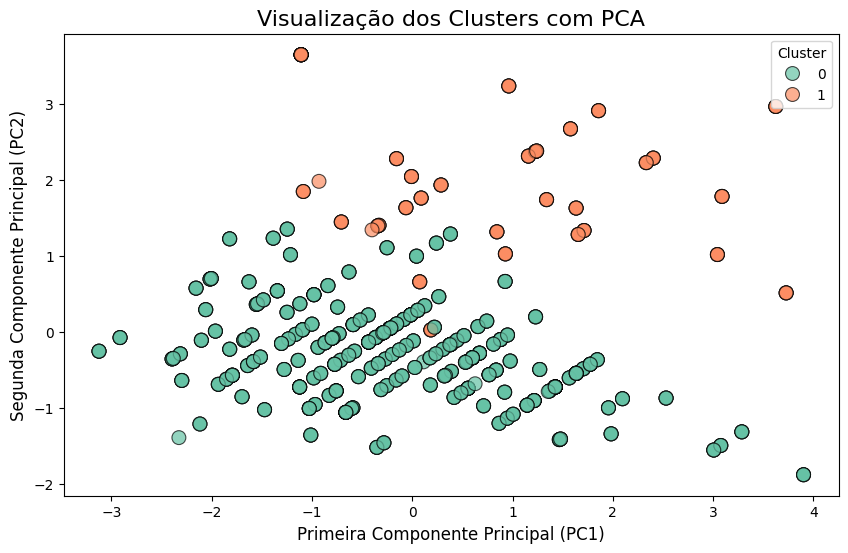

In [19]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dataset_ajustado[columns_to_scale])
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = dataset_ajustado['KMeans_Cluster']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set2', data=pca_df, s=100, alpha=0.7, edgecolor='black')

plt.title('Visualização dos Clusters com PCA', fontsize=16)
plt.xlabel('Primeira Componente Principal (PC1)', fontsize=12)
plt.ylabel('Segunda Componente Principal (PC2)', fontsize=12)
plt.legend(title='Cluster', loc='upper right')

plt.show()

1. ***B) DBScan***

Melhores parâmetros para DBSCAN: eps=0.3, min_samples=3, índice de silhueta=0.7872141574078897


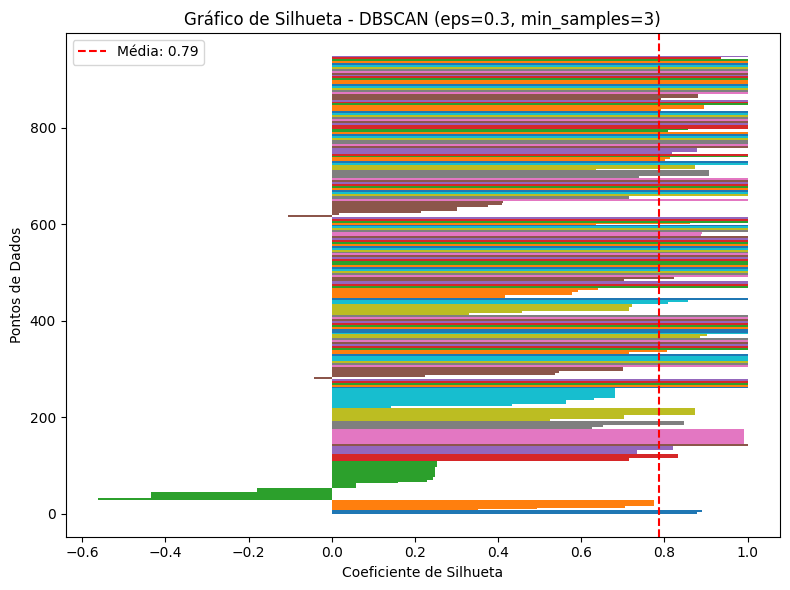

In [20]:
silhouette_scores_dbscan = []
eps_values = np.arange(0.3, 3.1, 3.0)
min_samples_values = range(3, 15)
# Realizar grid search para encontrar os melhores parâmetros
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(dataset_ajustado)


        if len(set(dbscan_labels)) > 1:
            silhouette_avg = silhouette_score(dataset_ajustado, dbscan_labels)
            silhouette_scores_dbscan.append((eps, min_samples, silhouette_avg))


best_params = max(silhouette_scores_dbscan, key=lambda x: x[2])
print(f'Melhores parâmetros para DBSCAN: eps={best_params[0]}, min_samples={best_params[1]}, índice de silhueta={best_params[2]}')


dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1])
dbscan_labels = dbscan.fit_predict(dataset_ajustado)

filtered_data = dataset_ajustado[dbscan_labels != -1]
filtered_labels = dbscan_labels[dbscan_labels != -1]

# Função para plotar o gráfico de silhueta
def plot_silhouette(data, labels, model_name, avg_silhouette):
    silhouette_vals = silhouette_samples(data, labels)
    y_lower, y_upper = 0, 0
    unique_clusters = np.unique(labels)

    plt.figure(figsize=(8, 6))

    for cluster in unique_clusters:
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0)
        y_lower += len(cluster_silhouette_vals)

    plt.axvline(avg_silhouette, color="red", linestyle="--", label=f"Média: {avg_silhouette:.2f}")
    plt.title(f"Gráfico de Silhueta - DBSCAN (eps={best_params[0]}, min_samples={best_params[1]})")
    plt.xlabel("Coeficiente de Silhueta")
    plt.ylabel("Pontos de Dados")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plotar o gráfico de silhueta com os melhores parâmetros
plot_silhouette(filtered_data, filtered_labels, "DBSCAN (Melhores Parâmetros)", best_params[2])

In [21]:
dbscan_labels = dbscan.fit_predict(dataset_ajustado)

# Adicionar os rótulos de cluster no dataset ajustado
dataset_ajustado['DBSCAN_Cluster'] = dbscan_labels

/tmp/ipython-input-3438612878.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_ajustado['DBSCAN_Cluster'] = dbscan_labels


2. ***Com os resultados em mão, descreva o processo de mensuração do índice de silhueta. Mostre o gráfico e justifique o número de clusters escolhidos.***

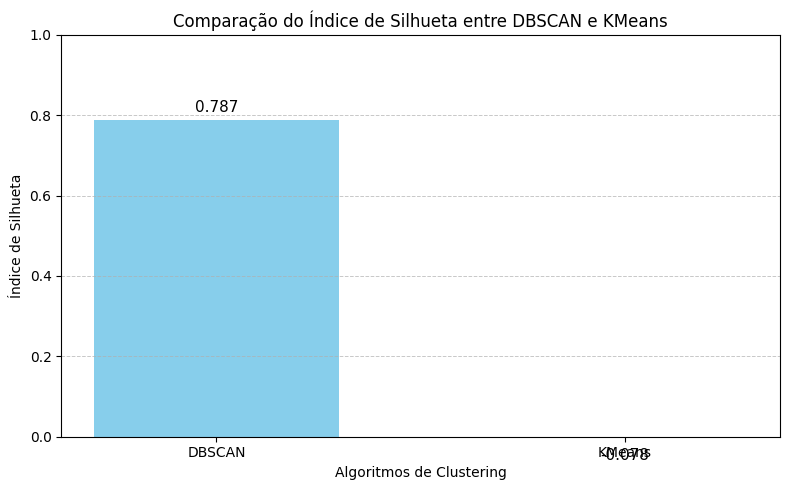

In [22]:
model_names = ['DBSCAN', 'KMeans']
silhouette_scores = [best_params[2], silhouette_avg]

plt.figure(figsize=(8, 5))
plt.bar(model_names, silhouette_scores, color=['skyblue', 'orange'], width=0.6)
plt.title('Comparação do Índice de Silhueta entre DBSCAN e KMeans')
plt.ylabel('Índice de Silhueta')
plt.xlabel('Algoritmos de Clustering')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

for i, score in enumerate(silhouette_scores):
    plt.text(i, score + 0.02, f"{score:.3f}", ha='center', fontsize=11)

plt.tight_layout()
plt.show()

O índice de silhueta é uma métrica que ajuda a avaliar se os clusters formados fazem sentido. Ele compara duas coisas:

**Coesão:** o quão perto um ponto está dos outros dentro do seu próprio cluster.

**Separação:** o quão distante ele está dos pontos do cluster mais próximo.

O resultado varia de -1 a 1:

**1 -** ponto muito bem agrupado

**0 -** ponto na fronteira entre dois clusters

**-1 -** ponto provavelmente no cluster errado

Para descobrir o número ideal de clusters, calculamos o índice de silhueta médio para vários valores de K e escolhemos aquele que apresenta a melhor combinação de coesão e separação. Isso nos dá um critério objetivo para validar o agrupamento. Depois, usamos o gráfico de silhueta para visualizar como cada ponto se distribui dentro dos clusters.

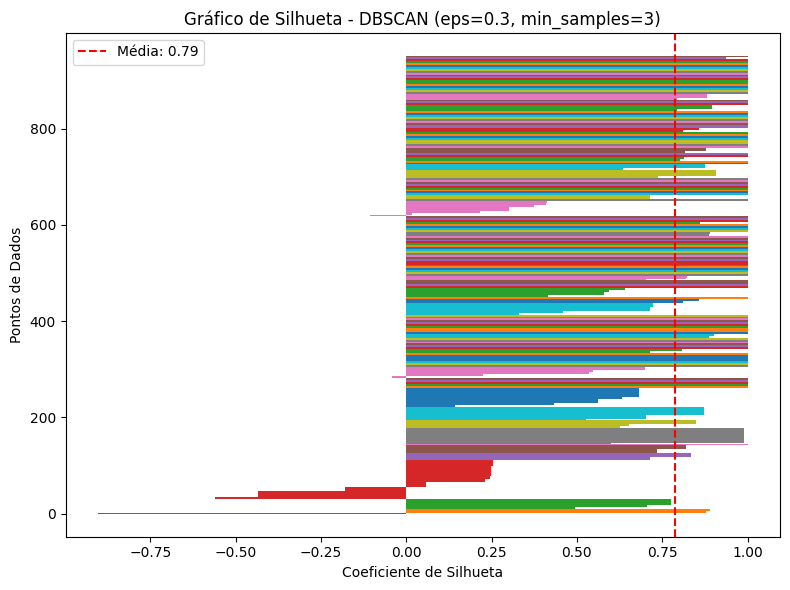

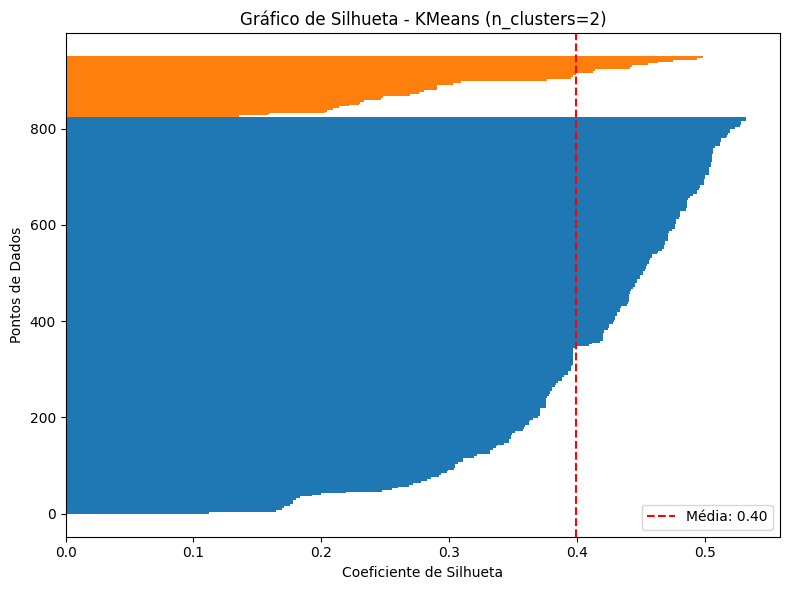

In [23]:
def plot_silhouette(data, labels, model_name, avg_silhouette):
    silhouette_vals = silhouette_samples(data, labels)
    y_lower, y_upper = 0, 0
    unique_clusters = np.unique(labels)
    plt.figure(figsize=(8, 6))

    for cluster in unique_clusters:
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0)
        y_lower += len(cluster_silhouette_vals)

    plt.axvline(avg_silhouette, color="red", linestyle="--", label=f"Média: {avg_silhouette:.2f}")
    plt.title(f"Gráfico de Silhueta - {model_name}")
    plt.xlabel("Coeficiente de Silhueta")
    plt.ylabel("Pontos de Dados")
    plt.legend()
    plt.tight_layout()
    plt.show()

dbscan_avg_silhouette = np.mean(silhouette_samples(dataset_ajustado[columns_to_scale], dbscan_labels))
kmeans_avg_silhouette = np.mean(silhouette_samples(dataset_ajustado[columns_to_scale], kmeans_labels))
plot_silhouette(dataset_ajustado[columns_to_scale], dbscan_labels,
                f"DBSCAN (eps={best_params[0]}, min_samples={best_params[1]})", dbscan_avg_silhouette)
plot_silhouette(dataset_ajustado[columns_to_scale], kmeans_labels,
                f"KMeans (n_clusters={best_kmeans_clusters})", kmeans_avg_silhouette)

3. ***Compare os dois resultados, aponte as semelhanças e diferenças e interprete.***

Ao comparar o índice de silhueta entre os dois algoritmos, o DBSCAN apresentou um valor mais alto, indicando clusters com boa coesão e boa separação. Isso mostra que ele conseguiu capturar melhor os padrões naturais do dataset.

Já o K-Means teve um índice mais baixo, sugerindo grupos menos coesos e com maior sobreposição.

Na visualização dos agrupamentos, o DBSCAN novamente se destacou: ele identificou clusters de formatos irregulares, lidou bem com diferentes densidades e ainda foi robusto a outliers. O K-Means, por assumir que os clusters são sempre esféricos, gerou grupos mais rígidos e pouco representativos da estrutura real dos dados.

No geral, o DBSCAN apresentou desempenho superior, especialmente por identificar padrões não lineares e se adaptar melhor às características do dataset. Isso reforça a importância de escolher o método de clusterização mais adequado ao tipo de dado analisado.

4. ***Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados. Observe, para a escolha, medidas adequadas aos algoritmos.***

Índice de Davies-Bouldin (DBI): Mede a compactação dos clusters e a separação entre eles.

In [24]:
dbi_kmeans = davies_bouldin_score(dataset_ajustado[columns_to_scale], kmeans_labels)
dbscan_valid_labels = dbscan_labels[dbscan_labels != -1]
dbscan_valid_data = dataset_ajustado[columns_to_scale].iloc[dbscan_labels != -1]
dbi_dbscan = davies_bouldin_score(dbscan_valid_data, dbscan_valid_labels)

print(f"Índice de Davies-Bouldin (K-Means): {dbi_kmeans:.3f}")
print(f"Índice de Davies-Bouldin (DBSCAN): {dbi_dbscan:.3f}")

Índice de Davies-Bouldin (K-Means): 1.186
Índice de Davies-Bouldin (DBSCAN): 0.251


Calinski-Harabasz: Avaliar a dispersão inter e intra-cluster.

In [25]:
chi_kmeans = calinski_harabasz_score(dataset_ajustado[columns_to_scale], kmeans_labels)
dbscan_valid_labels = dbscan_labels[dbscan_labels != -1]
dbscan_valid_data = dataset_ajustado[columns_to_scale].iloc[dbscan_labels != -1]
chi_dbscan = calinski_harabasz_score(dbscan_valid_data, dbscan_valid_labels)

print(f"Índice de Calinski-Harabasz (K-Means): {chi_kmeans:.3f}")
print(f"Índice de Calinski-Harabasz (DBSCAN): {chi_dbscan:.3f}")


Índice de Calinski-Harabasz (K-Means): 290.044
Índice de Calinski-Harabasz (DBSCAN): 769.124


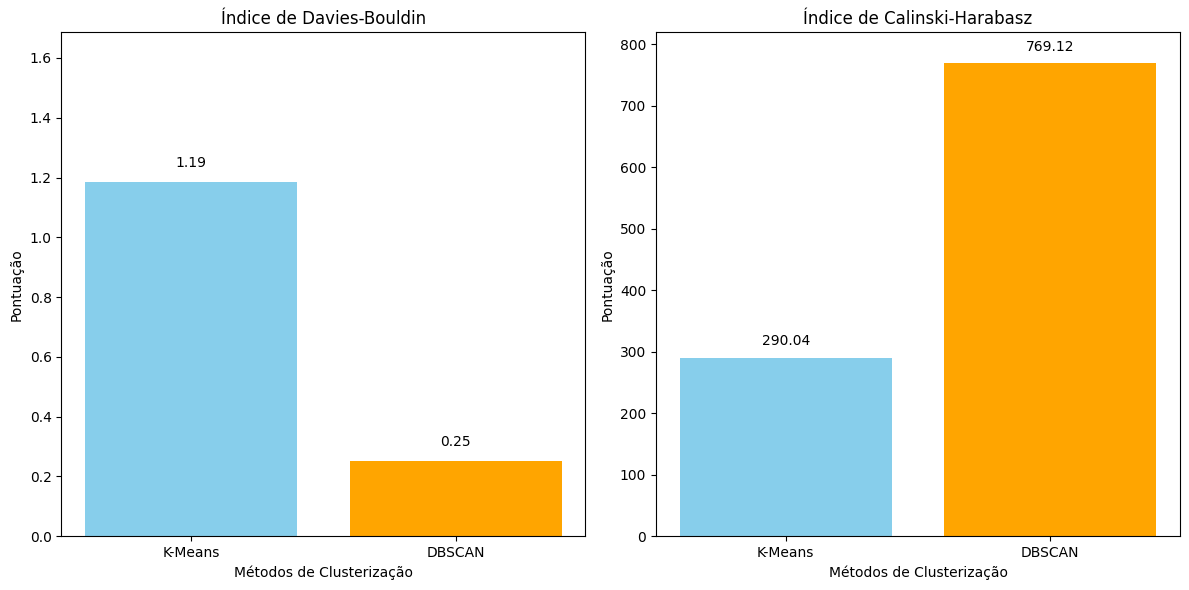

In [26]:
methods = ['K-Means', 'DBSCAN']
davies_bouldin_scores = [dbi_kmeans, dbi_dbscan]
calinski_harabasz_scores = [chi_kmeans, chi_dbscan]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(methods, davies_bouldin_scores, color=['skyblue', 'orange'])
plt.title('Índice de Davies-Bouldin')
plt.ylabel('Pontuação')
plt.xlabel('Métodos de Clusterização')
plt.ylim(0, max(davies_bouldin_scores) + 0.5)
for i, score in enumerate(davies_bouldin_scores):
    plt.text(i, score + 0.05, f"{score:.2f}", ha='center', fontsize=10)

# Gráfico para o Índice de Calinski-Harabasz
plt.subplot(1, 2, 2)
plt.bar(methods, calinski_harabasz_scores, color=['skyblue', 'orange'])
plt.title('Índice de Calinski-Harabasz')
plt.ylabel('Pontuação')
plt.xlabel('Métodos de Clusterização')
plt.ylim(0, max(calinski_harabasz_scores) + 50)
for i, score in enumerate(calinski_harabasz_scores):
    plt.text(i, score + 20, f"{score:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


5. ***Realizando a análise, responda: A silhueta é um o índice indicado para escolher o número de clusters para o algoritmo de DBScan?***

O índice de silhueta não é a melhor métrica para avaliar o número de clusters no DBSCAN, principalmente porque esse algoritmo costuma gerar ruídos e pontos isolados, que acabam distorcendo o cálculo da silhueta.

Para o DBSCAN, métricas como o Davies-Bouldin e o Calinski-Harabasz funcionam melhor, pois são mais robustas e conseguem avaliar a qualidade dos agrupamentos mesmo quando há ruídos ou clusters de formatos irregulares.

A silhueta até pode ser usada como um complemento, mas não deve ser a principal referência na hora de analisar os resultados do DBSCAN.

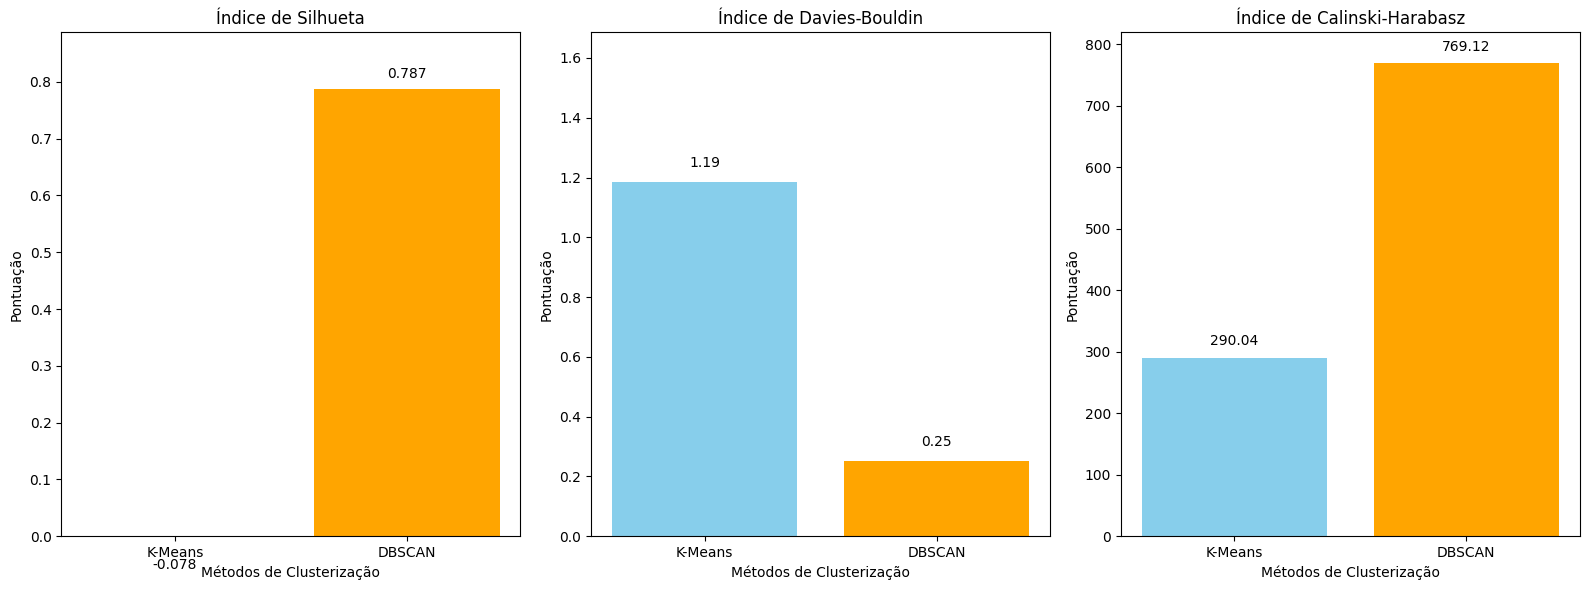

In [27]:
methods = ['K-Means', 'DBSCAN']
silhouette_scores = [silhouette_avg, best_params[2]]
davies_bouldin_scores = [dbi_kmeans, dbi_dbscan]
calinski_harabasz_scores = [chi_kmeans, chi_dbscan]

plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.bar(methods, silhouette_scores, color=['skyblue', 'orange'])
plt.title('Índice de Silhueta')
plt.ylabel('Pontuação')
plt.xlabel('Métodos de Clusterização')
plt.ylim(0, max(silhouette_scores) + 0.1)
for i, score in enumerate(silhouette_scores):
    plt.text(i, score + 0.02, f"{score:.3f}", ha='center', fontsize=10)

plt.subplot(1, 3, 2)
plt.bar(methods, davies_bouldin_scores, color=['skyblue', 'orange'])
plt.title('Índice de Davies-Bouldin')
plt.ylabel('Pontuação')
plt.xlabel('Métodos de Clusterização')
plt.ylim(0, max(davies_bouldin_scores) + 0.5)
for i, score in enumerate(davies_bouldin_scores):
    plt.text(i, score + 0.05, f"{score:.2f}", ha='center', fontsize=10)

plt.subplot(1, 3, 3)
plt.bar(methods, calinski_harabasz_scores, color=['skyblue', 'orange'])
plt.title('Índice de Calinski-Harabasz')
plt.ylabel('Pontuação')
plt.xlabel('Métodos de Clusterização')
plt.ylim(0, max(calinski_harabasz_scores) + 50)
for i, score in enumerate(calinski_harabasz_scores):
    plt.text(i, score + 20, f"{score:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# **MEDIDAS DE SIMILARIDADE**

1. ***Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários.***

Para agrupar 10 séries temporais em 3 grupos usando a correlação cruzada, seguimos algumas etapas importantes.

Primeiro, fazemos o pré-processamento, verificando se existem valores ausentes, tratando-os e aplicando normalização quando necessário. Em seguida, calculamos a correlação cruzada entre cada par de séries, que indica o quanto elas são semelhantes ao longo do tempo.

Com esses valores, construímos uma matriz de similaridade, onde cada posição representa o valor máximo de correlação entre duas séries. Essa matriz é então usada por um algoritmo de clusterização, configurado para formar 3 clusters, conforme o objetivo.

Por fim, avaliamos o resultado visualizando os agrupamentos e, se desejado, utilizando métricas como o índice de silhueta para verificar a qualidade dos clusters formados.

2. ***Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.***

O agrupamento hierárquico é uma boa escolha nesse tipo de análise porque trabalha diretamente com medidas de similaridade, como a correlação máxima entre séries temporais. Ele utiliza a matriz de similaridade para formar grupos de maneira progressiva, unindo primeiro as séries mais parecidas.

Uma vantagem importante é a interpretação visual: o dendrograma. Ele mostra, de forma clara, como as séries se conectam e quão semelhantes são entre si, facilitando a identificação natural dos grupos.

3. ***Indique um caso de uso para essa solução projetada.***

Em uma análise temporal de clima, por exemplo, podemos ter várias séries representando as temperaturas diárias de diferentes regiões ao longo de um período. Cada série corresponde ao histórico de temperatura de uma localidade específica.

Ao comparar essas séries, usando a correlação máxima entre elas, conseguimos identificar regiões que apresentam padrões climáticos semelhantes. Com isso, é possível agrupar as cidades em clusters, revelando quais áreas compartilham comportamentos parecidos ao longo do tempo.

4. ***Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.***

Existem dois métodos muito usados para medir a similaridade entre séries temporais: a correlação de Pearson e a DTW.

A correlação de Pearson indica o quanto duas séries se relacionam de forma linear, mostrando se sobem e descem juntas. Já a DTW (Dynamic Time Warping) compara as séries mesmo quando elas têm deslocamentos no tempo ou ritmos diferentes, ajustando seus pontos para encontrar o melhor alinhamento.

Por isso, a DTW é especialmente útil quando as séries não estão perfeitamente sincronizadas, enquanto a correlação funciona melhor quando elas têm comportamentos alinhados no tempo.